In [366]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
%matplotlib inline

In [367]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    '''
    тут вимірність X  (m, n), а y (m, 1)
    '''
    return X, y

In [368]:
def split_datasets(X, y, test_size):
    '''
    Розбиває дані на 2 датасети: тренувальний та тестувальний.
    
    Параметри:
    X - набір характеристик
    y - набір передбачуваних величин
    test_size - розмір тестового датасету
    
    Результат:
    X_train - набір тренувальних прикладів
    X_test - набір тестових прикладів
    y_train - вектор величин, що передбачаємо для тренувального датасету
    y_test - вектор величин, що передбачаємо для тестового датасету
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) # метод sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None)
    return X_train, X_test, y_train, y_test

In [369]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(X[positive_indices, 1], X[positive_indices, 2], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(X[negative_indices, 1], X[negative_indices, 2], marker='+', c= 'blue' if test else 'red')
    
    #plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    #plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')
    
    #plt.show()

In [395]:
def decision_boundary(X, y, mean, std, theta):
    
    ax=None
    threshold=0.5
    contourf=False
        
    x_1 = X[:,1]
    x_2 = X[:,2]
    
    xx1, xx2 = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 100), np.linspace(x_2.min(), x_2.max(), 100))
    
    X_pred = np.c_[xx1.ravel(), xx2.ravel(), xx1.ravel()**2, xx1.ravel()*xx2.ravel(), xx2.ravel()**2] #xx1.ravel()**3, xx2.ravel()**3]
    X_pred = prepare_X(X_pred)
    '''
    new_series = pd.DataFrame(X_pred)
    print(new_series)
    '''        
    pred = h(X_pred, theta)
    predictions = np.where(pred >= 0.5, 1, 0).T
    '''
    new_series = pd.DataFrame(pred)
    print(new_series)
    count = np.count_nonzero(predictions == 1)
    print(count)
    '''    
    
    Z = pred.reshape((100, 100))  # reshape seq to grid
    if ax is None:
        ax = plt.gca()
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((x_1.min(), x_1.max()))
    ax.set_ylim((x_2.min(), x_2.max()))
    plt.show()

In [396]:
def plot_surface(est, x_1, x_2, ax=None, threshold=0.5, contourf=False):

    """Plots the decision surface of ``est`` on features ``x1`` and ``x2``. """
    
    xx1, xx2 = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 100), np.linspace(x_2.min(), x_2.max(), 100))
    
    X_pred = np.c_[xx1.ravel(), xx2.ravel(), xx1.ravel()**2, xx1.ravel()*xx2.ravel(), xx2.ravel()**2 ]#, xx1.ravel()**3, xx2.ravel()**3]
    X_pred = prepare_X(X_pred)
    
    '''
    new_series = pd.DataFrame(X_pred)
    print(new_series)  
    '''       
    pred = est.predict_proba(X_pred)[:, 1]
        
    '''
    new_series = pd.DataFrame(est.coef_)
    print(new_series)
     
    new_series = pd.DataFrame(pred)
    print(new_series)
        
    predictions = np.where(pred>=0.5, 1, 0).T
    count = np.count_nonzero(predictions == 1)
    print(count)
    '''
    
    Z = pred.reshape((100, 100))  # reshape seq to grid
    if ax is None:
        ax = plt.gca()
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((x_1.min(), x_1.max()))
    ax.set_ylim((x_2.min(), x_2.max()))
    plt.show()

In [372]:
def normalize(X):
    
    mean = np.mean(X, axis=0) 
    '''
    numpy.mean(a, axis=None)    vertically downwards across rows (axis 0), 
    np.mean(X, axis=0).shape = (1,n)  - отримаємо n (тут n = 1) середніх значень відповідно до кількості характеристик
    '''
    std = np.std(X, axis=0)
    '''
    numpy.std(a, axis=None)    vertically downwards across rows (axis 0), 
    np.std(X, axis=0).shape = (1,n)  - отримаємо n (тут n = 1) стандартних відхилень відповідно до кількості характеристик
    '''
    X_new = (X - mean) / std 
    ''' 
    поелементне віднімання та ділення для об'єктів np.array, бо для звичайних phython list не працює
    потрібно, щоб кількість стовців у X_new, mean, std була однаковою n (тут n = 1)
    '''
    return X_new, mean, std

In [373]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [374]:
def sigmoid(z):
    #z - вектор стовпець, тобто (m, 1)
    g = 1/(1 + np.exp(-z))
    return g

In [432]:
def h(X, theta):
    '''
    X - матриця (m, n+1)
    theta - вектор-стовпець (n+1, 1)
    z - вектор стовпець, тобто (m, 1) 
    Щоб його отримати (m, 1) = (m, n+1) * (n+1, 1)
    ''' 
    z = np.dot(X, theta)
    
    return sigmoid(z)

In [375]:
def cost_function(X, y, theta):    
    m = X.shape[0]
    if m == 0:
        return None
    '''
    h_result.shape = (m, 1)
    y.shape = (m, 1)
    y.T'.shape = (1, m)
    np.dot(y.T, np.log(h_result)) =  (1, m) *  (m, 1) = (1, 1)
    '''
    h_result = h(X, theta)
    J = (-1/m) * ( np.dot(y.T, np.log(h_result)) + np.dot((1 - y).T, np.log(1 - h_result)) )

    return J
                

In [376]:
def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    '''
    X.T.shape = (n+1, m)
    (h(X, theta)-y).shape = (m,1)
    np.dot(X.T, h(X, theta)-y).shape = (n+1, 1)
    Оскільки вектор похідних має бути тієії ж розмірності, що й thetha - вектор-(стовпець) параметрів: розмірності (n+1, 1),
    то виконуємо транспонування
    np.dot(X.T, h(X, theta)-y).shape = (n+1, 1)

    np.shape(X)[0]) - кількість рядків(прикладів) m у матриці X 
    '''
    loss = h(X, theta) - y
    d_theta = (1/m)* np.dot(X.T, loss)
    
    return d_theta

In [377]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = cost_function(X, y, theta)
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        theta = theta - alpha*derivative_theta(X, y, theta)
        
        J = cost_function(X, y, theta)      
        
        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history

In [378]:
def predict(X, mean, std, theta):
    '''
    повертає масив зі значенням y = {0,1} для кожного прикладу датасету
    
    тут  також є формули на випадорк, якщо отримуємо дані вигляду x1, x2
    '''
    #degree = 2  
    #poly = PolynomialFeatures(degree)
    #X = poly.fit_transform(X)
    #X = np.array(X[:, 1:])
    #m = X.shape[0] 
    #X = (X - mean) / std
    #X = prepare_X(X)
    pred = h(X, theta)
    predictions = np.where(pred >= 0.5, 1, 0)
    return predictions

## Основний код

In [379]:
#data_columns = ["exam1", "exam2"]
#target_column = "submitted"
#X, y = load_datasets('sats.csv', data_columns, target_column)
#print('Training set: X={}, y={}'.format(X.shape, y.shape))

In [420]:
#Спробувати на цьому датасеті після написання всіх функцій і відлагодження на попередньому

data_columns = ["test1", "test2"]
target_column = "passed"
X, y = load_datasets('tests.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

#(X.max(axis = 0))
#print(X.min(axis = 0))


#df = pd.read_csv('testsCom.csv')
#X, y = df[["test1", "test2", "test1test1", "test2test2", "test1test2", "test1test1test1", "test2test2test2"]], df['passed']
#print('Training set: X={}, y={}'.format(X.shape, y.shape))

Training set: X=(118, 2), y=(118,)


In [421]:
degree = 2
poly = PolynomialFeatures(degree)
X = poly.fit_transform(X)
print(X.shape, y.shape)

(118, 6) (118,)


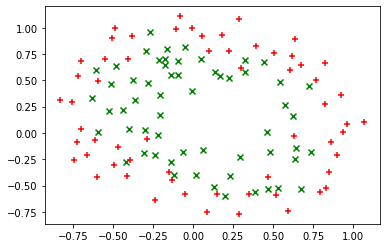

In [422]:
plot_data(X, y)

In [423]:
X_new, mean, std = normalize(X[:, 1:])

In [424]:
X_new = prepare_X(X_new)
print(X_new.shape)
y_new = y.values.reshape((X.shape[0],))
print(y_new.T)

(118, 6)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [425]:
test_size = 0.05
X_train, X_test, y_train, y_test = split_datasets(X_new, y_new, test_size)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(112, 6), y=(112,)
Test set: X=(6, 6), y=(6,)


In [426]:
theta = np.zeros((X_new.shape[1],))
print(theta.shape)

(6,)


In [427]:
cost_function(X_train, y_train, theta)

0.6931471805599453

In [428]:
new_theta, Js = gradient_descent(X_train, y_train, theta, 0.01, 1e-10, 100000, False)
print(new_theta, len(Js))

[-0.17333589  1.60497722  2.15267476 -2.9301054  -1.62115415 -3.166919  ] 61342


In [429]:
cost_function(X_train, y_train, new_theta)

0.3538013962813971

In [430]:
#T = np.array([[40, 40], [60, 65]])
T = X_test
y_predicted = predict(T, mean, std, new_theta)

print(y_predicted.T)
print(y_test)
#print(accuracy_score(y_test, y_predicted.T))
number_right = 0
for i in range(y_test.shape[0]):
    if (y_predicted[i] == y_test[i]):
        number_right = number_right + 1
accuracy_custom = number_right/ y_test.shape[0]
print(accuracy_custom)
#print(accuracy_score(y, y_predicted)) - можна також використати такий метод (тоді не потрбні обрахунки вище)


[1 0 0 0 1 1]
[1 0 0 0 1 0]
0.8333333333333334


In [431]:
#передбачення для датасету train
y_predicted_train_custom = predict(X_train, mean, std, new_theta)
print(y_predicted_train_custom)
print(y_train)
accuracy_train_custom = accuracy_score(y_train, y_predicted_train_custom)
print(accuracy_train_custom)

[1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1
 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0
 0]
[1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0
 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1
 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1
 0]
0.8482142857142857


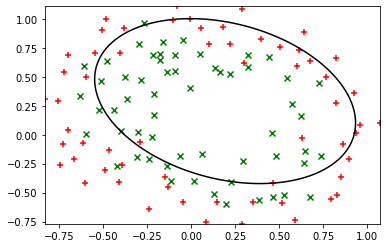

In [433]:
plot_data(X, y)
decision_boundary(X, y, mean, std, new_theta)

In [435]:
#y_pred = clf.predict(X_test[:, 1:])
y_pred = clf.predict(X_test)

In [436]:
y_pred

array([1, 0, 1, 0, 1, 1], dtype=int64)

In [437]:
accuracy_score(y_test, y_pred)

0.6666666666666666

In [438]:
accuracy_sk = accuracy_score(y_test, y_pred)

In [439]:
#передбачення для датасету train
y_predicted_train_sk = clf.predict(X_train)
print(y_predicted_train_sk)
print(y_train)
accuracy_train_sk = accuracy_score(y_train, y_predicted_train_sk)
print(accuracy_train_sk)

[1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0
 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 0]
[1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0
 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1
 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1
 0]
0.7767857142857143


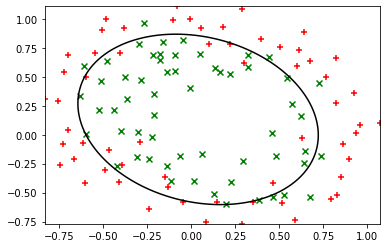

In [440]:
plot_data(X, y)


plot_surface(clf,X[:,1],X[:,2])

In [443]:
print("Compare accuracy of custom and sklearn algorithm (for degree 2 ).\n")
print("TEST Data.\n")
res_compare_test = pd.DataFrame({'accuracy_custom_test' : [accuracy_custom], 'accuracy_sk_test' : [accuracy_sk], 'difference in %' : [abs(accuracy_custom - accuracy_sk)]})
print(res_compare_test)
print("TRAIN Data.\n")
res_compare_train = pd.DataFrame({'accuracy_custom_train' : [accuracy_train_custom], 'accuracy_sk_train' : [accuracy_train_sk], 'difference in %' : [abs(accuracy_train_custom - accuracy_train_sk)]})
print(res_compare_train)

Compare accuracy of custom and sklearn algorithm (for degree 2 ).

TEST Data.

   accuracy_custom_test  accuracy_sk_test  difference in %
0              0.833333          0.666667         0.166667
TRAIN Data.

   accuracy_custom_train  accuracy_sk_train  difference in %
0               0.848214           0.776786         0.071429


In [444]:
# sk learn attributes
print(clf.n_iter_)
print(clf.n_features_in_)
print(clf.intercept_)
print(clf.classes_)

[18]
6
[1.19944583]
[0 1]
